## KUDAGO categories relation
Goal - to estimate relations between different kudago categories.

to do: 


In [1]:
#connection to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#read dataset
import pandas as pd
DATA0 = pd.read_csv("/content/drive/My Drive/Multi-scale events detection/kudago/403-497_clean.csv", delimiter=';', encoding='cp1251', error_bad_lines=False)
DATA1 = pd.read_csv("/content/drive/My Drive/Multi-scale events detection/kudago/1-402_clean.csv", delimiter=';', encoding='cp1251', error_bad_lines=False)
DATA2 = pd.read_csv("/content/drive/My Drive/Multi-scale events detection/kudago/497-1653_clean.csv", delimiter=';', encoding='cp1251', error_bad_lines=False)
DATA = pd.concat([DATA0,DATA1,DATA2])

# First step: analyzing event tags

In [17]:
#cut the table
df = DATA[['Category', 'Event tag']]

In [18]:
#checking what kind of categories we have
df.groupby(['Category']).count()


,Event tag
Category,
business-events,476
"business-events,entertainment",6
"business-events,festival",17
"business-events,festival,entertainment",1
"business-events,festival,recreation",1
...,...
"tour,recreation,entertainment",5
"tour,yarmarki-razvlecheniya-yarmarki,entertainment",3
yarmarki-razvlecheniya-yarmarki,5


Firstly, let's not use events of multiple categories


In [19]:
#checking how many events we have for each category
df_new = df[~df['Category'].str.contains(',', na=False)]
df_new.groupby(['Category']).count()

,Event tag
Category,
business-events,476
cinema,106
concert,56347
education,10641
entertainment,2625
exhibition,15125
fashion,125
festival,4040
holiday,835


In [20]:
#concatenation of all tags for each category
df_grouped = df_new.groupby(['Category']).apply(lambda x: ','.join(x['Event tag']))
df_grouped.head()

Category
business-events    12+,события для бизнеса,события для бизнеса,со...
cinema             кинопоказы,12+,кино (развлечения),кино (развле...
concert            рэп и хип-хоп,концерты,16+,концерты,альтернати...
education          обучение,16+,лучшее,искусство,обучение,12+,рис...
entertainment      игры,развлечения,16+,шоу,лучшее в театрах,разв...
dtype: object

In [21]:
#We want to know which tags (rows) were used for which categories (columns) and how many times (data in cells)
#To do it we create DataFrame from the dict of subdicts: one subdict for one category, each subdict maps tag to number of tag's usages 
dict_lists = dict()
for index in df_grouped.index:
  temp = df_grouped.get(index).rsplit(',')
  one_dict = {i:temp.count(i) for i in temp}
  dict_lists[index]=(one_dict)


In [28]:
#final statistics DataFrame
df_final = pd.DataFrame(dict_lists).fillna(0)

In [29]:
!pip install supervenn

In [30]:
from supervenn import supervenn

In [31]:
#labels are categories
labels = list(df_final.columns)
#sets are tags
sets = []
for index in df_grouped.index:
  temp = df_grouped.get(index).rsplit(',')
  sets.append(set(temp))

In [32]:
#to find intersections of categories we don't consider unique tags
new_sets = []
for i in range(len(sets)):
  temp_list = []
  for j in range(len(sets)):
    #avoiding comparing with the same set
    if i == j:
      continue
    #we collect not unique tags into list
    temp_list.extend(sets[i] & sets[j])
  #now we need to convert our collection to set
  new_sets.append(set(temp_list))

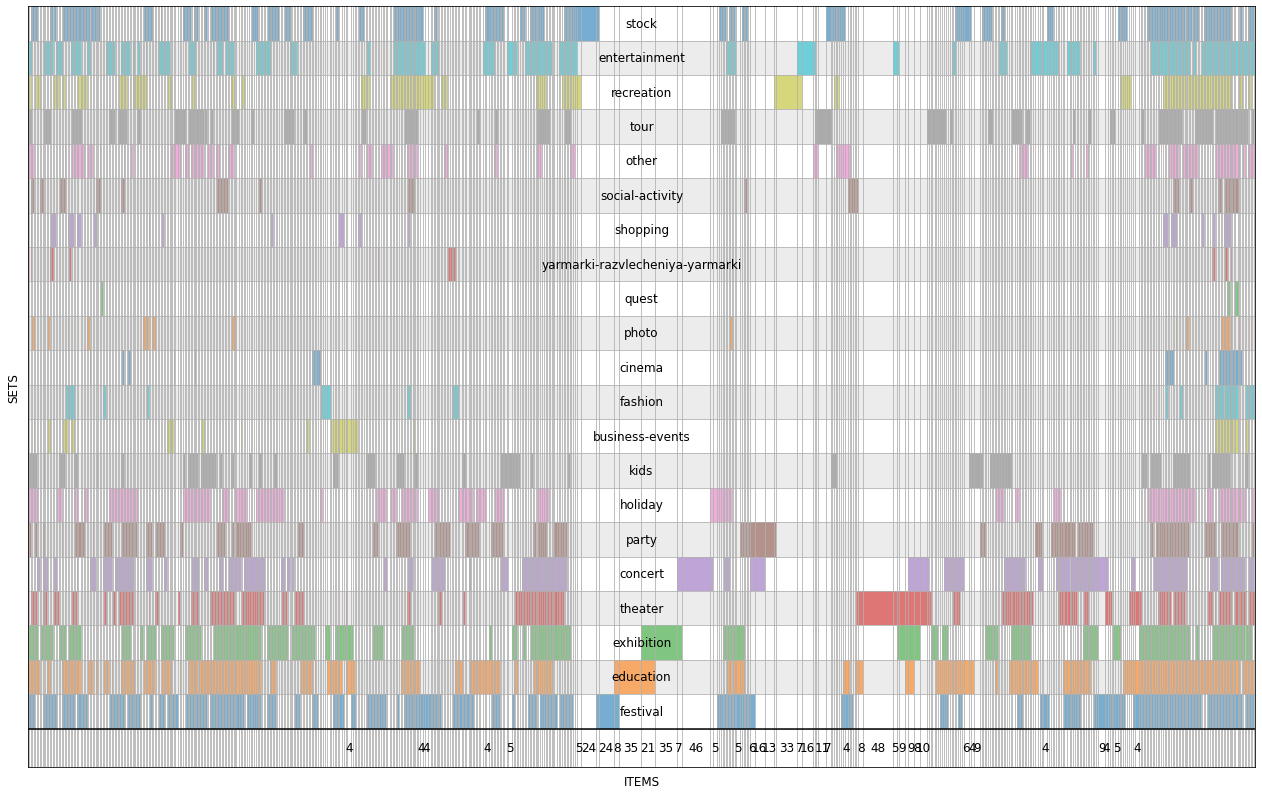

In [37]:
#visualize data with method from https://habr.com/ru/company/yandex/blog/501924/
import matplotlib.pyplot as plt
plt.figure(figsize=(22, 14))
plt.xlabel('Event tags')
plt.ylabel('Categories')
supervenn(sets, labels, side_plots=False, chunks_ordering='minimize gaps', sets_ordering='minimize gaps', widths_minmax_ratio=0.05, min_width_for_annotation=4)